In [1]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline



unable to import 'smart_open.gcs', disabling that module


In [2]:
log=pd.read_csv("C:/Users/Vanita/Desktop/kashmir.csv")
log.head()
data=log[log.country_name.isin(["Pakistan","India","Azad Jammu and Kashmir","Jammu and Kashmir"])]
data.head()

c:\users\vanita\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (15,71,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,country_name
44,x902514967576023040,x1076364192893014016,22-12-2018 06:29,AtiaZoon,Gaining global sympathy-written with foresight...,Twitter for iPhone,127,NaN,NaN,NaN,...,1996,29-08-2017 12:55,False,NaN,NaN,en,https://pbs.twimg.com/profile_banners/90251496...,NaN,http://pbs.twimg.com/profile_images/9562091267...,Azad Jammu and Kashmir
45,x2992209818,x1074568054456111104,17-12-2018 07:32,SardarUmarHayat,STOP KILLINGS IN #KASHMIR <U+0001F691>,Twitter for Android,27,NaN,NaN,NaN,...,33989,22-01-2015 09:53,False,NaN,NaN,en,https://pbs.twimg.com/profile_banners/29922098...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1069946996...,Azad Jammu and Kashmir
46,x1276882849,x1074268560418111488,16-12-2018 11:42,MadihaShakil,Indian occupational terrorist goons rapist arm...,Twitter for Android,278,NaN,NaN,NaN,...,67,18-03-2013 05:36,False,NaN,NaN,en,https://pbs.twimg.com/profile_banners/12768828...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1076402413...,Azad Jammu and Kashmir
47,x1276882849,x1076507683270938626,22-12-2018 16:00,MadihaShakil,"A rival to few, legend to many.\r\n\r\nInspira...",Twitter for iPhone,108,x1076506237850783744,x1276882849,MadihaShakil,...,67,18-03-2013 05:36,False,NaN,NaN,en,https://pbs.twimg.com/profile_banners/12768828...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1076402413...,Azad Jammu and Kashmir
48,x1276882849,x1075774755897192454,20-12-2018 15:27,MadihaShakil,Imran khan called @antonioguterres n expressed...,Twitter for Android,129,NaN,NaN,NaN,...,67,18-03-2013 05:36,False,NaN,NaN,en,https://pbs.twimg.com/profile_banners/12768828...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1076402413...,Azad Jammu and Kashmir


In [4]:
kl=data[data.created_at >= '15-12-2018 02:42']
kl.shape
kl=kl.sort_values(by=["created_at"])
kl=kl[kl.created_at < '17-12-2018 11:52']
kll=kl.iloc[:,88:89]
dff=kl.iloc[:,4:5]
df=dff.join(kll)
df.head()

,text,country_name
571,"@UNGeneva #Kashmir is in gang war, violation a...",India
728,#Kashmir\r\n\r\nRemembering Nirmaljit Singh Se...,India
3126,#flash \r\n Gunshots heard in sirnu area of pu...,Jammu and Kashmir
741,"#Kashmir\r\nAnd it is time, time to uproot \r\...",India
1998,#BREAKING \r\n\r\n#Kashmir:::Gunshots heard as...,Jammu and Kashmir


In [34]:
#df=df[df["country_name"]=='India']

In [5]:
df=df[df["country_name"]=='Jammu and Kashmir']

In [6]:
df["text"]=df["text"].apply(lambda x:re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.{\w_-}+)+))({\w.,@?^%&:/~+})([\w@?^%&/~+#-])?','' ,x ) )

In [8]:
data = df.text.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

print(data[:1])

<>:4: DeprecationWarning: invalid escape sequence \S
<>:7: DeprecationWarning: invalid escape sequence \s
<>:4: DeprecationWarning: invalid escape sequence \S
<>:7: DeprecationWarning: invalid escape sequence \s
<>:4: DeprecationWarning: invalid escape sequence \S
<>:7: DeprecationWarning: invalid escape sequence \s
<ipython-input-8-ed8da0f864b7>:4: DeprecationWarning: invalid escape sequence \S
  data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
<ipython-input-8-ed8da0f864b7>:7: DeprecationWarning: invalid escape sequence \s
  data = [re.sub('\s+', ' ', sent) for sent in data]


['#flash Gunshots heard in sirnu area of pulwama #pulwama #kashmir']


In [9]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

data_words

[['flash',
  'gunshots',
  'heard',
  'in',
  'sirnu',
  'area',
  'of',
  'pulwama',
  'pulwama',
  'kashmir'],
 ['breaking',
  'kashmir',
  'gunshots',
  'heard',
  'as',
  'forces',
  'lay',
  'seize',
  'of',
  'kharpora',
  'manghama',
  'sirhama',
  'area',
  'of',
  'pulwama',
  'more',
  'details',
  'awaited',
  'kashmir_news'],
 ['for',
  'bjp',
  'preparing',
  'to',
  'go',
  'big',
  'on',
  'social',
  'media',
  'in',
  'kashmir',
  'https',
  'co',
  'etglade',
  'hj',
  'https',
  'co',
  'goabismgqw'],
 ['kashmir',
  'gunfight',
  'starts',
  'in',
  'pulwama',
  'kashmirdispatch',
  'https',
  'co',
  'wt',
  'hj',
  'uki'],
 ['history',
  'of',
  'jammu',
  'amp',
  'kashmir',
  'indeed',
  'that',
  'of',
  'indian',
  'subcontinent',
  'would',
  'have',
  'been',
  'different',
  'if',
  'sardarpatel',
  'had',
  'been',
  'given',
  'free',
  'hand',
  'to',
  'deal',
  'with',
  'kashmir'],
 ['its',
  'happening',
  'in',
  'pakistan',
  'what',
  'future',
  '

In [10]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

['gunshot hear area', 'break gunshot hear force lie seize more detail await']


In [11]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(data_lemmatized)
data_vectorized
### here we ignore the terms that appear in less tham 5 document

<1362x234 sparse matrix of type '<class 'numpy.int64'>'
	with 6199 stored elements in Compressed Sparse Row format>

In [12]:
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  1.9450406014282666 %


In [13]:
lda_model = LatentDirichletAllocation(n_components=20,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [14]:
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -35674.44863167094
Perplexity:  213.87368131273485
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 20,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [15]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda =LatentDirichletAllocation(max_iter=5,learning_method='online',learning_offset=50,random_state=0)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)
#GridSearchCV(cv=None ,error_score='raise',estimator=LatentDirichletAllocation(batch_size=128,doc_topic_prior=None,evaluate_every=-1,learning_decay=0.7,learning_method=None,learning_offset=10,max_doc_update_iter=100,max_iter=10,mean_change_tol=0.001,n_components=10,n_jobs=1,perp_tol=0.1,random_state=None,topic_word_prior=None,total_samples=1000000,verbose=0),iid=True,n_jobs=1,param_grid={'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]},pre_dispatch='2*n_jobs',refit=True,return_train_score='warn',scoring=None,verbose=0)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='online',
                                                 learning_offset=50,
                                                 max_doc_update_iter=100,
                                                 max_iter=5,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1, random_state=0,
                                                 topic_word_prior=None,
                                                 total_samples=1000000.0,
                                 

In [16]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -8753.580594632685
Model Perplexity:  195.2036210132221


In [29]:
model.cv_results_['mean_test_score']

array([ -8753.58059463,  -9111.05583329,  -9255.03423346,  -9408.25509089,
        -9642.04677091,  -9201.10372663, -10306.09177903, -11309.40510748,
       -12546.92140984, -14004.03282303,  -9854.20647453, -11742.05954814,
       -13863.30769436, -16158.69474923, -18739.27272756])

In [31]:
model.cv_results_['params']

[{'learning_decay': 0.5, 'n_components': 10},
 {'learning_decay': 0.5, 'n_components': 15},
 {'learning_decay': 0.5, 'n_components': 20},
 {'learning_decay': 0.5, 'n_components': 25},
 {'learning_decay': 0.5, 'n_components': 30},
 {'learning_decay': 0.7, 'n_components': 10},
 {'learning_decay': 0.7, 'n_components': 15},
 {'learning_decay': 0.7, 'n_components': 20},
 {'learning_decay': 0.7, 'n_components': 25},
 {'learning_decay': 0.7, 'n_components': 30},
 {'learning_decay': 0.9, 'n_components': 10},
 {'learning_decay': 0.9, 'n_components': 15},
 {'learning_decay': 0.9, 'n_components': 20},
 {'learning_decay': 0.9, 'n_components': 25},
 {'learning_decay': 0.9, 'n_components': 30}]

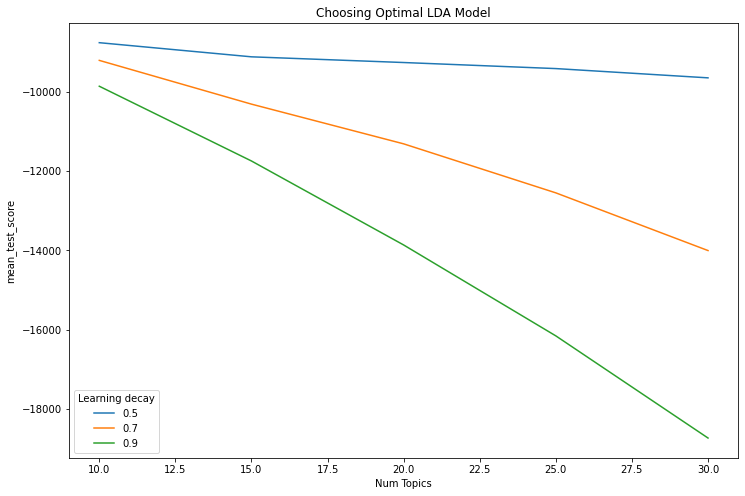

In [35]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [10, 15, 20, 25, 30]
log_likelyhoods_5 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.5]
log_likelyhoods_7 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.7]
log_likelyhoods_9 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("mean_test_score")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [18]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.05,0.05,0.05,0.05,0.05,0.05,0.55,0.05,0.05,0.05,6
Doc1,0.35,0.03,0.03,0.03,0.03,0.03,0.39,0.03,0.03,0.03,6
Doc2,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.55,0.05,8
Doc3,0.05,0.05,0.55,0.05,0.05,0.05,0.05,0.05,0.05,0.05,2
Doc4,0.03,0.03,0.03,0.03,0.03,0.03,0.28,0.52,0.03,0.03,7
Doc5,0.01,0.01,0.01,0.01,0.3,0.01,0.59,0.01,0.01,0.01,6
Doc6,0.02,0.24,0.02,0.02,0.02,0.02,0.63,0.02,0.02,0.02,6
Doc7,0.23,0.01,0.01,0.01,0.01,0.01,0.66,0.01,0.01,0.01,6
Doc8,0.02,0.24,0.02,0.02,0.02,0.02,0.63,0.02,0.02,0.02,6
Doc9,0.01,0.13,0.11,0.11,0.01,0.01,0.59,0.01,0.01,0.01,6


In [19]:
###### for India

pyLDAvis.enable_notebook(local=True)
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
panel

c:\users\vanita\appdata\local\programs\python\python37\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
c:\users\vanita\appdata\local\programs\python\python37\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
6      32.420952   8.115230       1        1  19.245674
9       0.648955  71.707100       2        1  15.515308
0      71.019684   9.971006       3        1  10.924816
4       3.785981  33.185135       4        1  10.389363
5     -42.666500  -9.222070       5        1   8.058810
3      -3.621689 -43.526516       6        1   8.038350
2      -3.632402  -4.171708       7        1   7.118618
8     -36.584400  35.804413       8        1   7.078162
1      44.391380  50.615383       9        1   6.859600
7      40.235809 -31.591665      10        1   6.771299, topic_info=    Category        Freq            Term       Total  loglift  logprob
28   Default  273.000000        civilian  273.000000  30.0000  30.0000
147  Default  123.000000          people  123.000000  29.0000  29.0000
105  Default  142.000000         killing  142.000000  28.0000  28.0000
64   Default  144.000000           force  144.000000  27.0000  27.0000
156  Default  103.000000         pulwama  103.000000  26.0000  26.0000
21   Default   78.000000          bullet   78.000000  25.0000  25.0000
94   Default  139.000000          indian  139.000000  24.0000  24.0000
122  Default   60.000000          martyr   60.000000  23.0000  23.0000
1    Default   77.000000             amp   77.000000  22.0000  22.0000
44   Default   60.000000           death   60.000000  21.0000  21.0000
139  Default   55.000000             old   55.000000  20.0000  20.0000
42   Default   76.000000             day   76.000000  19.0000  19.0000
52   Default   76.000000       encounter   76.000000  18.0000  18.0000
103  Default   65.000000    kashmirbleed   65.000000  17.0000  17.0000
113  Default   44.000000            life   44.000000  16.0000  16.0000
104  Default  321.000000            kill  321.000000  15.0000  15.0000
117  Default   47.000000            lose   47.000000  14.0000  14.0000
53   Default   38.000000             end   38.000000  13.0000  13.0000
34   Default   37.000000        continue   37.000000  12.0000  12.0000
11   Default   68.000000           blood   68.000000  11.0000  11.0000
180  Default   55.000000            site   55.000000  10.0000  10.0000
29   Default   48.000000           clash   48.000000   9.0000   9.0000
96   Default   83.000000          injure   83.000000   8.0000   8.0000
128  Default   37.000000           month   37.000000   7.0000   7.0000
230  Default   37.000000            year   37.000000   6.0000   6.0000
207  Default   36.000000             try   36.000000   5.0000   5.0000
111  Default   34.000000           leave   34.000000   4.0000   4.0000
157  Default   49.000000  pulwamakilling   49.000000   3.0000   3.0000
204  Default   59.000000           today   59.000000   2.0000   2.0000
125  Default   67.000000        militant   67.000000   1.0000   1.0000
..       ...         ...             ...         ...      ...      ...
68   Topic10   26.462713        genocide   27.829211   2.6421  -2.8340
231  Topic10   12.212992       yesterday   13.184361   2.6159  -3.6072
191  Topic10   12.311049           story   13.305650   2.6148  -3.5992
80   Topic10    9.013144         history   12.105223   2.3975  -3.9111
157  Topic10   30.724035  pulwamakilling   49.094469   2.2238  -2.6847
103  Topic10   38.612983    kashmirbleed   65.375158   2.1659  -2.4562
77   Topic10   15.604472           heart   30.861080   2.0105  -3.3622
62   Topic10    6.678300         fighter   15.275274   1.8651  -4.2109
90   Topic10    4.545617         hussain   10.560745   1.8495  -4.5956
51   Topic10    8.557518           dozen   21.838268   1.7556  -3.9629
0    Topic10    4.603787            abid   16.261401   1.4306  -4.5829
60   Topic10    2.912436            feel   12.622687   1.2260  -5.0408
12   Topic10    2.396699       bloodbath   10.800239   1.1870  -5.2357
156  Topic10   20.311136         pulwama  103.709439   1.0621  -3.0986
39   Topic10    1.9

In [20]:
###### for India

pyLDAvis.enable_notebook(local=True)
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
panel

c:\users\vanita\appdata\local\programs\python\python37\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
6      32.420952   8.115230       1        1  19.245674
9       0.648955  71.707100       2        1  15.515308
0      71.019684   9.971006       3        1  10.924816
4       3.785981  33.185135       4        1  10.389363
5     -42.666500  -9.222070       5        1   8.058810
3      -3.621689 -43.526516       6        1   8.038350
2      -3.632402  -4.171708       7        1   7.118618
8     -36.584400  35.804413       8        1   7.078162
1      44.391380  50.615383       9        1   6.859600
7      40.235809 -31.591665      10        1   6.771299, topic_info=    Category        Freq            Term       Total  loglift  logprob
28   Default  273.000000        civilian  273.000000  30.0000  30.0000
147  Default  123.000000          people  123.000000  29.0000  29.0000
105  Default  142.000000         killing  142.000000  28.0000  28.0000
64   Default  144.000000           force  144.000000  27.0000  27.0000
156  Default  103.000000         pulwama  103.000000  26.0000  26.0000
21   Default   78.000000          bullet   78.000000  25.0000  25.0000
94   Default  139.000000          indian  139.000000  24.0000  24.0000
122  Default   60.000000          martyr   60.000000  23.0000  23.0000
1    Default   77.000000             amp   77.000000  22.0000  22.0000
44   Default   60.000000           death   60.000000  21.0000  21.0000
139  Default   55.000000             old   55.000000  20.0000  20.0000
42   Default   76.000000             day   76.000000  19.0000  19.0000
52   Default   76.000000       encounter   76.000000  18.0000  18.0000
103  Default   65.000000    kashmirbleed   65.000000  17.0000  17.0000
113  Default   44.000000            life   44.000000  16.0000  16.0000
104  Default  321.000000            kill  321.000000  15.0000  15.0000
117  Default   47.000000            lose   47.000000  14.0000  14.0000
53   Default   38.000000             end   38.000000  13.0000  13.0000
34   Default   37.000000        continue   37.000000  12.0000  12.0000
11   Default   68.000000           blood   68.000000  11.0000  11.0000
180  Default   55.000000            site   55.000000  10.0000  10.0000
29   Default   48.000000           clash   48.000000   9.0000   9.0000
96   Default   83.000000          injure   83.000000   8.0000   8.0000
128  Default   37.000000           month   37.000000   7.0000   7.0000
230  Default   37.000000            year   37.000000   6.0000   6.0000
207  Default   36.000000             try   36.000000   5.0000   5.0000
111  Default   34.000000           leave   34.000000   4.0000   4.0000
157  Default   49.000000  pulwamakilling   49.000000   3.0000   3.0000
204  Default   59.000000           today   59.000000   2.0000   2.0000
125  Default   67.000000        militant   67.000000   1.0000   1.0000
..       ...         ...             ...         ...      ...      ...
68   Topic10   26.462713        genocide   27.829211   2.6421  -2.8340
231  Topic10   12.212992       yesterday   13.184361   2.6159  -3.6072
191  Topic10   12.311049           story   13.305650   2.6148  -3.5992
80   Topic10    9.013144         history   12.105223   2.3975  -3.9111
157  Topic10   30.724035  pulwamakilling   49.094469   2.2238  -2.6847
103  Topic10   38.612983    kashmirbleed   65.375158   2.1659  -2.4562
77   Topic10   15.604472           heart   30.861080   2.0105  -3.3622
62   Topic10    6.678300         fighter   15.275274   1.8651  -4.2109
90   Topic10    4.545617         hussain   10.560745   1.8495  -4.5956
51   Topic10    8.557518           dozen   21.838268   1.7556  -3.9629
0    Topic10    4.603787            abid   16.261401   1.4306  -4.5829
60   Topic10    2.912436            feel   12.622687   1.2260  -5.0408
12   Topic10    2.396699       bloodbath   10.800239   1.1870  -5.2357
156  Topic10   20.311136         pulwama  103.709439   1.0621  -3.0986
39   Topic10    1.9

In [21]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

,abid,amp,area,armed,army,arrest,ask,away,baby,basis,...,woman,word,work,world,wound,write,year,yesterday,young,youth
Topic0,0.339848,0.101400,0.129165,0.101158,0.121365,0.101356,0.101175,6.151068,0.101319,0.101111,...,0.103539,0.100984,0.101176,0.101215,0.102290,0.101518,0.100891,0.101228,0.101893,8.535973
Topic1,0.101615,0.118819,0.476658,1.145443,3.779929,23.303842,0.104097,0.103705,0.101063,0.101082,...,0.101346,0.112699,0.102371,0.101644,0.101319,0.101075,0.101252,0.109286,0.107121,0.139566
Topic2,0.103320,49.700114,0.158766,0.104542,0.116366,0.101544,5.751997,4.625706,0.101043,0.101368,...,0.101054,0.101320,0.103137,25.449259,0.101189,0.101098,0.101007,0.103141,0.101313,15.636567
Topic3,0.101124,0.105907,0.104184,0.101250,9.996240,0.101144,14.609965,0.101498,0.103974,0.101613,...,0.102107,25.425727,0.102586,5.544353,0.102400,0.417145,37.684346,0.103591,0.101151,2.271049
Topic4,0.101260,0.103459,0.101374,0.101874,0.102774,0.113670,0.529133,0.103719,0.101033,11.249945,...,0.101456,0.101389,0.102292,0.104379,0.101058,0.101920,0.101641,0.101970,20.931991,0.116920


In [22]:
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,pulwama,bullet,encounter,kill,injure,site,civilian,injury,police,detain,critical,pellet,clash,hit,succumb
Topic 1,people,https,support,internet,house,arrest,service,demand,state,thank,suspend,tell,democracy,follow,report
Topic 2,amp,end,leave,body,world,restriction,impose,family,live,long,killing,youth,operation,start,son
Topic 3,life,lose,year,kill,word,people,occupy,shut,son,ask,high,mourn,cold,exam,celebrate
Topic 4,right,use,human,place,want,leader,student,young,love,kashmirbleed,tweet,peace,stop,way,know
Topic 5,old,month,blood,kill,dead,daughter,milk,land,indonesian,return,buy,father,woman,husband,girl
Topic 6,kill,force,killing,civilian,indian,militant,area,protest,condemn,security,army,shoot,dead,terrorist,injure
Topic 7,martyr,kashmirbleed,continue,pulwamakilling,issue,genocide,raise,civilian,pulwama,heart,story,yesterday,blood,injure,history
Topic 8,civilian,death,try,clash,toll,gunfight,fail,write,local,post,die,kill,bring,reach,site
Topic 9,day,innocent,kill,today,say,massacre,need,people,protest,amp,come,time,integral,make,good


In [23]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization

    # Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))

    # Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    # Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)

    # Step 4: LDA Transform
    topic_probability_scores = best_lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    return topic, topic_probability_scores

# Predict the topic
mytext = ["peaceful India"]
topic, prob_scores = predict_topic(text = mytext)
print(topic)

['pulwama', 'bullet', 'encounter', 'kill', 'injure', 'site', 'civilian', 'injury', 'police', 'detain', 'critical', 'pellet', 'clash', 'hit', 'succumb']
